### 복습

In [1]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

#### 카테고리 로드

In [2]:
import glob

In [7]:
img_paths = glob.glob('./googlenet/fig/*.*')
classNames = []
with open('./googlenet/classification_classes_ILSVRC2012.txt', 'rt') as f:
    classNames = f.read().rstrip('\n').split('\n')
print(classNames)

['tench, Tinca tinca', 'goldfish, Carassius auratus', 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 'tiger shark, Galeocerdo cuvieri', 'hammerhead, hammerhead shark', 'electric ray, crampfish, numbfish, torpedo', 'stingray', 'cock', 'hen', 'ostrich, Struthio camelus', 'brambling, Fringilla montifringilla', 'goldfinch, Carduelis carduelis', 'house finch, linnet, Carpodacus mexicanus', 'junco, snowbird', 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', 'robin, American robin, Turdus migratorius', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel, dipper', 'kite', 'bald eagle, American eagle, Haliaeetus leucocephalus', 'vulture', 'great grey owl, great gray owl, Strix nebulosa', 'European fire salamander, Salamandra salamandra', 'common newt, Triturus vulgaris', 'eft', 'spotted salamander, Ambystoma maculatum', 'axolotl, mud puppy, Ambystoma mexicanum', 'bullfrog, Rana catesbeiana', 'tree frog, tree-frog', 'tailed frog, bell toad, 

#### opencv: model load(onix)

In [5]:
model = './googlenet/googlenet-12.onnx'
config = ''
net = cv2.dnn.readNet(model, config)
if net.empty():
    print('model load failed')
    sys.exit()

In [ ]:
idx = 0
while True:
    img = cv2.imread(img_paths[idx])

    if img is None:
        print('img load failed')
        break
    blob = cv2.dnn.blobFromImage(img, 1, (224, 224), (104, 117, 123), swapRB = False)
    net.setInput(blob)
    prob = net.forward()

    out = prob.flatten()
    max_index = np.argmax(out)
    confidence = out[max_index]
    class_name = classNames[max_index]

    text = f'{class_name}, {confidence*100:.2f}%'

    cv2.putText(img, text, (20, 20), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.imshow('img', img)

    if cv2.waitKey(3000) == 27:
        break

    idx += 1
    if idx >= len(img_paths):
        idx = 0
cv2.destroyAllWindows()

#### tensorflow: VGG16

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16

In [3]:
vgg16_pretrained = VGG16(weights='imagenet', include_top= True)

2023-03-03 09:49:57.590972: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-03 09:49:57.609525: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-03 09:49:57.609990: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-03 09:49:57.610888: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

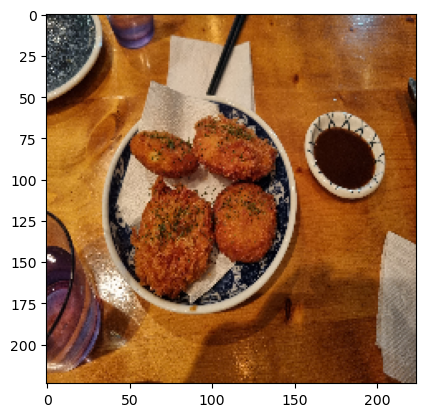

In [4]:
img_path = './googlenet/fig/food.jpg'
img = keras.preprocessing.image.load_img(img_path, target_size = (224, 224))
x = keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = keras.applications.vgg16.preprocess_input(x)

plt.imshow(img)
plt.show()

In [8]:
output = vgg16_pretrained.predict(x)
output = output.flatten()

max_index = np.argmax(output)
confidence = output[max_index]
class_name = classNames[max_index]

text = f'{class_name}, {confidence*100:.2f}%'

1/1 [==============================] - 0s 30ms/step


In [10]:
img = cv2.imread(img_path, cv2.IMREAD_REDUCED_COLOR_4)

cv2.putText(img, text, (50, 50), cv2.FONT_ITALIC, 2, (0, 0, 255), 2, cv2.LINE_AA)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x1aa88d30) is not the object's thread (0x1a898aa0).
Cannot move to target thread (0x1aa88d30)

QObject::moveToThread: Current thread (0x1aa88d30) is not the object's thread (0x1a898aa0).
Cannot move to target thread (0x1aa88d30)

QObject::moveToThread: Current thread (0x1aa88d30) is not the object's thread (0x1a898aa0).
Cannot move to target thread (0x1aa88d30)

QObject::moveToThread: Current thread (0x1aa88d30) is not the object's thread (0x1a898aa0).
Cannot move to target thread (0x1aa88d30)

QObject::moveToThread: Current thread (0x1aa88d30) is not the object's thread (0x1a898aa0).
Cannot move to target thread (0x1aa88d30)

QObject::moveToThread: Current thread (0x1aa88d30) is not the object's thread (0x1a898aa0).
Cannot move to target thread (0x1aa88d30)

QObject::moveToThread: Current thread (0x1aa88d30) is not the object's thread (0x1a898aa0).
Cannot move to target thread (0x1aa88d30)

QObject::moveToThread: Current thread (0x1aa88d30) is n

### Face Detector (Chat-GPT)

In [21]:
import cv2
import numpy as np

# SSD 모델 로드
net = cv2.dnn.readNetFromCaffe('./face_detector/deploy.prototxt.txt', './face_detector/res10_300x300_ssd_iter_140000_fp16.caffemodel')

# 이미지 불러오기
image = cv2.imread('./face_detector/fig/faces.jpg')

# 이미지 크기 조정
height, width = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

# SSD 모델에 입력하기
net.setInput(blob)

# SSD 모델에서 얼굴 검출
detections = net.forward()

# 검출된 얼굴에 대한 정보 출력
for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    if confidence > 0.5:
        box = detections[0, 0, i, 3:7] * np.array([width, height, width, height])
        (startX, startY, endX, endY) = box.astype('int')

        # 검출된 얼굴에 박스 그리기
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)

# 결과 이미지 출력
cv2.imshow('Output', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


QObject::moveToThread: Current thread (0x6a11430) is not the object's thread (0x79f3090).
Cannot move to target thread (0x6a11430)

QObject::moveToThread: Current thread (0x6a11430) is not the object's thread (0x79f3090).
Cannot move to target thread (0x6a11430)

QObject::moveToThread: Current thread (0x6a11430) is not the object's thread (0x79f3090).
Cannot move to target thread (0x6a11430)

QObject::moveToThread: Current thread (0x6a11430) is not the object's thread (0x79f3090).
Cannot move to target thread (0x6a11430)

QObject::moveToThread: Current thread (0x6a11430) is not the object's thread (0x79f3090).
Cannot move to target thread (0x6a11430)

QObject::moveToThread: Current thread (0x6a11430) is not the object's thread (0x79f3090).
Cannot move to target thread (0x6a11430)

QObject::moveToThread: Current thread (0x6a11430) is not the object's thread (0x79f3090).
Cannot move to target thread (0x6a11430)

QObject::moveToThread: Current thread (0x6a11430) is not the object's thread

In [10]:
import pandas as pd

In [33]:
img = cv2.imread('./face_detector/fig/faces3.jpg', cv2.IMREAD_REDUCED_COLOR_2)

if img is None:
    print('img read failed')
    sys.exit()

# ## 1. Tensorflow Model
# model = './face_detector/opencv_face_detector_uint8.pb'
# config = './face_detector/opencv_face_detector.pbtxt.txt'

## 2. Caffe Model
model = './face_detector/res10_300x300_ssd_iter_140000_fp16.caffemodel'
config = './face_detector/deploy.prototxt.txt'

face_net = cv2.dnn.readNet(model, config)
if face_net.empty():
    print('model load failed')
    sys.exit()

blob = cv2.dnn.blobFromImage(img, 1, (300, 300), (104, 177, 123), swapRB = False)
face_net.setInput(blob)
out = face_net.forward()

# labels = ['id', 'obj_score', 'confidence', 'x1', 'x2', 'y1', 'y2']
# out_df = pd.DataFrame(out[0][0], columns = labels)
# out_df.head()

output = out[0,0,:,:]
h, w = img.shape[:2]

for i in range(output.shape[0]):
    confidence = output[i, 2]

    if confidence > 0.5:
        x1 = int(output[i, 3] * w)
        y1 = int(output[i, 4] * h)
        x2 = int(output[i, 5] * w)
        y2 = int(output[i, 6] * h)

        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 1)

        text = f'Face: {confidence*100:.2f}%'

        cv2.putText(img, text, (x1, y1-3), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 1, cv2.LINE_AA)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x6a11430) is not the object's thread (0x79f3090).
Cannot move to target thread (0x6a11430)

QObject::moveToThread: Current thread (0x6a11430) is not the object's thread (0x79f3090).
Cannot move to target thread (0x6a11430)

QObject::moveToThread: Current thread (0x6a11430) is not the object's thread (0x79f3090).
Cannot move to target thread (0x6a11430)

QObject::moveToThread: Current thread (0x6a11430) is not the object's thread (0x79f3090).
Cannot move to target thread (0x6a11430)

QObject::moveToThread: Current thread (0x6a11430) is not the object's thread (0x79f3090).
Cannot move to target thread (0x6a11430)

QObject::moveToThread: Current thread (0x6a11430) is not the object's thread (0x79f3090).
Cannot move to target thread (0x6a11430)

QObject::moveToThread: Current thread (0x6a11430) is not the object's thread (0x79f3090).
Cannot move to target thread (0x6a11430)

QObject::moveToThread: Current thread (0x6a11430) is not the object's thread

### Yolo model

In [13]:
model = './yolo_v3/yolov3.weights'
config = './yolo_v3/yolov3.cfg.txt'
class_Names = './yolo_v3/coco.names.txt'
classes = []
with open(class_Names, 'rt') as f:
    classes = f.read().rstrip('\n').split('\n')

img_paths = glob.glob('./yolo_v3/fig/*.*')

# print(img_paths)

net = cv2.dnn.readNet(model, config)

if net.empty():
    print('model load failed')
    sys.exit()

colors = np.random.uniform(0, 255, size=(len(classes), 3))
layer_names = net.getLayerNames()
output_layers = [layer_names[i-1] for i in net.getUnconnectedOutLayers()]
# print(output_layers)

for i in img_paths:
    img = cv2.imread(i)

    if img is None:
        continue
    blob = cv2.dnn.blobFromImage(img, 1/255., (320, 320), swapRB = True)
    net.setInput(blob)
    outs = net.forward(output_layers)

    h, w = img.shape[:2]

    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > 0.5:
                cx = int(detection[0] * w)
                cy = int(detection[1] * h)
                bw = int(detection[2] * w)
                bh = int(detection[3] * h)

                sx = int(cx-bw/2)
                sy = int(cy-bh/2)

                boxes.append([sx, sy, bw, bh])
                confidences.append(confidence)
                class_ids.append(class_id)
    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    for i in indices:
        sx, sy, bw, bh = boxes[i]
        label = f'{classes[class_ids[i]]}, {confidences[i]*100:.2f}%'
        color = colors[class_ids[i]]
        cv2.rectangle(img, (sx, sy, bw, bh), color, 2, cv2.LINE_AA)
        cv2.putText(img, label, (sx, sy-3), cv2.FONT_HERSHEY_COMPLEX, 0.7, color, 1, cv2.LINE_AA)
    cv2.imshow('img', img)
    cv2.waitKey()
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x7fd41f0) is not the object's thread (0x360857e0).
Cannot move to target thread (0x7fd41f0)

QObject::moveToThread: Current thread (0x7fd41f0) is not the object's thread (0x360857e0).
Cannot move to target thread (0x7fd41f0)

QObject::moveToThread: Current thread (0x7fd41f0) is not the object's thread (0x360857e0).
Cannot move to target thread (0x7fd41f0)

QObject::moveToThread: Current thread (0x7fd41f0) is not the object's thread (0x360857e0).
Cannot move to target thread (0x7fd41f0)

QObject::moveToThread: Current thread (0x7fd41f0) is not the object's thread (0x360857e0).
Cannot move to target thread (0x7fd41f0)

QObject::moveToThread: Current thread (0x7fd41f0) is not the object's thread (0x360857e0).
Cannot move to target thread (0x7fd41f0)

QObject::moveToThread: Current thread (0x7fd41f0) is not the object's thread (0x360857e0).
Cannot move to target thread (0x7fd41f0)

QObject::moveToThread: Current thread (0x7fd41f0) is not the object's